In [1]:
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, precision_score, r2_score, mean_squared_error
# impot pipeline
from sklearn.pipeline import Pipeline
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [2]:
df = pd.read_csv(r"C:\Users\navya\Desktop\MajorFinal(Heart Disease Prediction)\MajorFinal(Heart Disease Prediction)\majorfinal.csv")

In [3]:
#Checking the dataset:

In [4]:
print(df.shape)

(920, 17)


In [5]:
df.head()

,Unnamed: 0,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,BMI
0,0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,0,18
1,1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,2,29
2,2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,1,22
3,3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,0,20
4,4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,0,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   id          920 non-null    int64  
 2   age         920 non-null    int64  
 3   sex         920 non-null    object 
 4   dataset     920 non-null    object 
 5   cp          920 non-null    object 
 6   trestbps    861 non-null    float64
 7   chol        890 non-null    float64
 8   fbs         830 non-null    object 
 9   restecg     918 non-null    object 
 10  thalch      865 non-null    float64
 11  exang       865 non-null    object 
 12  oldpeak     858 non-null    float64
 13  slope       611 non-null    object 
 14  ca          309 non-null    float64
 15  num         920 non-null    int64  
 16  BMI         920 non-null    int64  
dtypes: float64(5), int64(5), object(7)
memory usage: 122.3+ KB


In [7]:
print(df.isnull().sum().sort_values(ascending=False))

ca            611
slope         309
fbs            90
oldpeak        62
trestbps       59
thalch         55
exang          55
chol           30
restecg         2
num             0
Unnamed: 0      0
id              0
cp              0
dataset         0
sex             0
age             0
BMI             0
dtype: int64


In [8]:
#Performing EDA

Mean: 53.51086956521739
Median: 54.0
Mode: 54


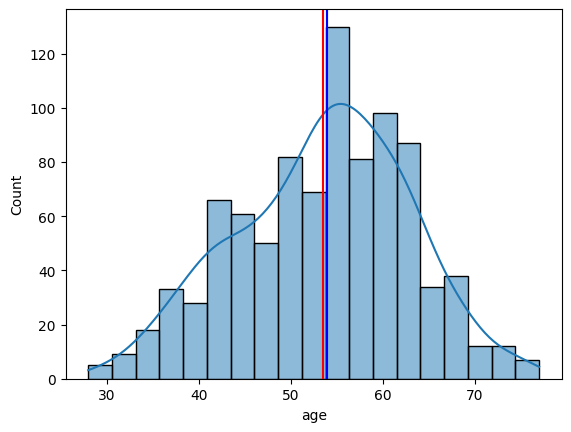

In [9]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [10]:
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show(renderer="browser")

In [11]:
print(df['sex'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64


In [12]:

male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%


<Axes: ylabel='count'>

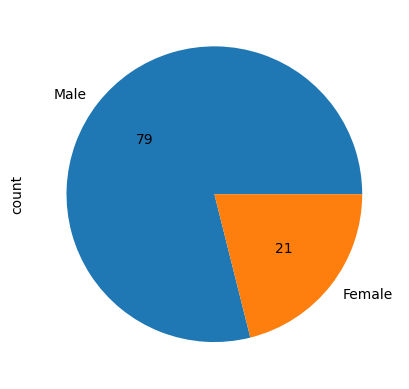

In [13]:
df['sex'].value_counts().plot(kind='pie',autopct='%2.f')

In [14]:

df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [15]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [16]:
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


<Axes: xlabel='dataset,num'>

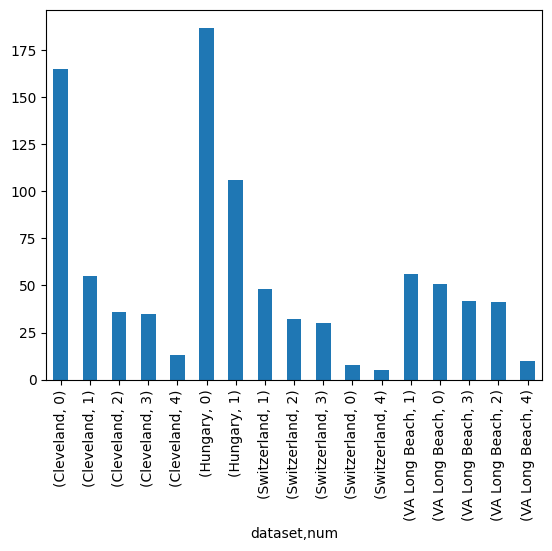

In [17]:
df.groupby('dataset')['num'].value_counts().plot(kind='bar')

In [18]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Axes(0.125,0.11;0.775x0.77)


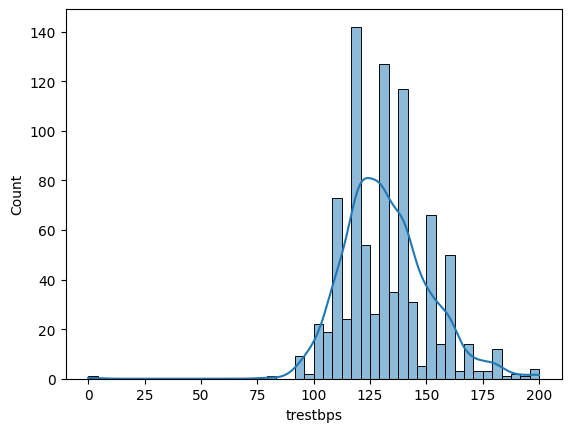

In [19]:
print(sns.histplot(df['trestbps'], kde=True))

In [20]:
# make a plot of trestbps column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='trestbps', color='dataset')
fig.show(renderer="browser")

In [21]:
df.groupby(df['sex'])[['trestbps']].describe()

trestbps                                                         
          count        mean        std   min    25%    50%    75%    max
sex                                                                     
Female    192.0  132.093750  19.509202  94.0  120.0  130.0  140.0  200.0
Male      669.0  132.143498  18.951807   0.0  120.0  130.0  140.0  200.0

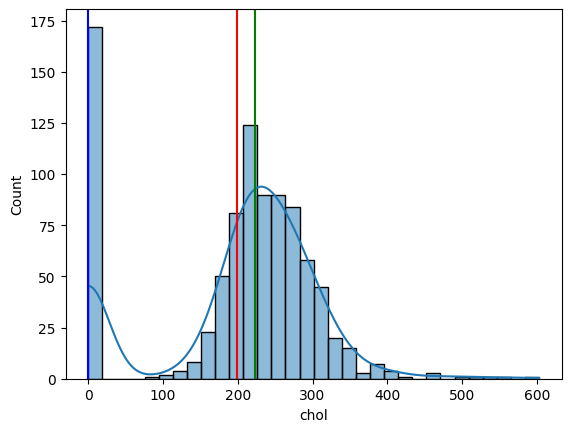

In [22]:
sns.histplot(df['chol'], kde=True)
plt.axvline(df['chol'].mean(), color='red')
plt.axvline(df['chol'].median(), color='green')
plt.axvline(df['chol'].mode()[0], color='blue')

In [23]:
df.groupby(df['sex'])[['chol']].describe()

chol                                                         
        count        mean         std  min    25%    50%    75%    max
sex                                                                   
Female  187.0  241.481283   86.291226  0.0  204.0  244.0  291.0  564.0
Male    703.0  187.864865  113.858400  0.0  156.5  220.0  263.0  603.0

In [24]:
df['fbs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: fbs
Non-Null Count  Dtype 
--------------  ----- 
830 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [25]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [26]:
df.groupby(df['fbs'])[['sex']].value_counts()

fbs    sex   
False  Male      528
       Female    164
True   Male      119
       Female     19
Name: count, dtype: int64

In [27]:
df['restecg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: restecg
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [28]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [29]:
df.groupby(df['restecg'])[['sex']].value_counts()

restecg           sex   
lv hypertrophy    Male      141
                  Female     47
normal            Male      432
                  Female    119
st-t abnormality  Male      151
                  Female     28
Name: count, dtype: int64

In [30]:
df.groupby(df['restecg'])[['dataset']].value_counts()

restecg           dataset      
lv hypertrophy    Cleveland        149
                  VA Long Beach     27
                  Switzerland        7
                  Hungary            5
normal            Hungary          235
                  Cleveland        151
                  Switzerland       85
                  VA Long Beach     80
st-t abnormality  VA Long Beach     93
                  Hungary           52
                  Switzerland       30
                  Cleveland          4
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


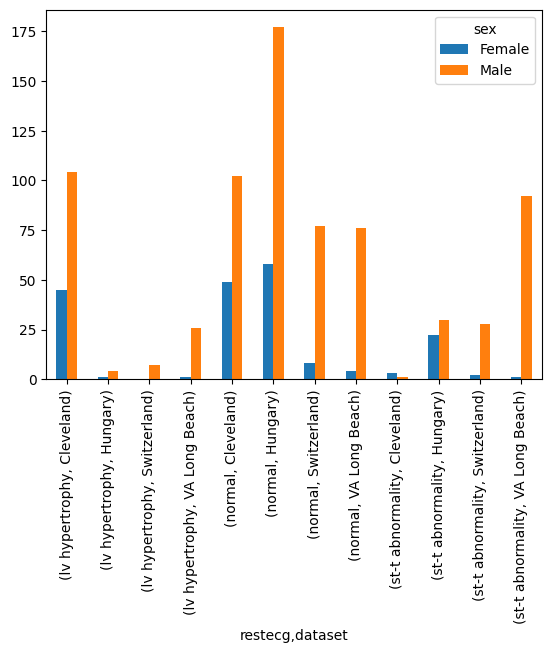

In [31]:
counts = df.groupby(df['restecg'])[['dataset','sex']].value_counts().unstack()
print(counts.plot.bar())

In [32]:
df['thalch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: thalch
Non-Null Count  Dtype  
--------------  -----  
865 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


Axes(0.125,0.11;0.775x0.77)


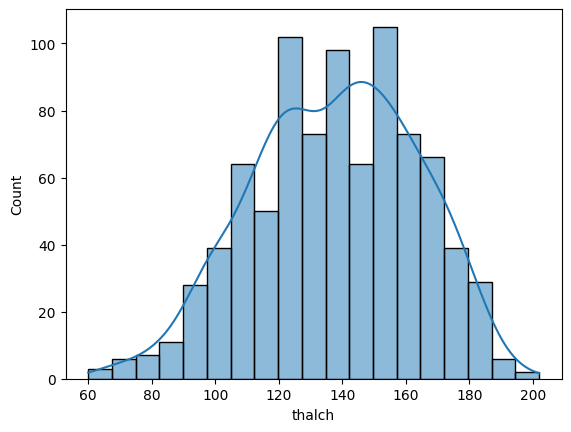

In [33]:
print(sns.histplot(df['thalch'],kde = True))

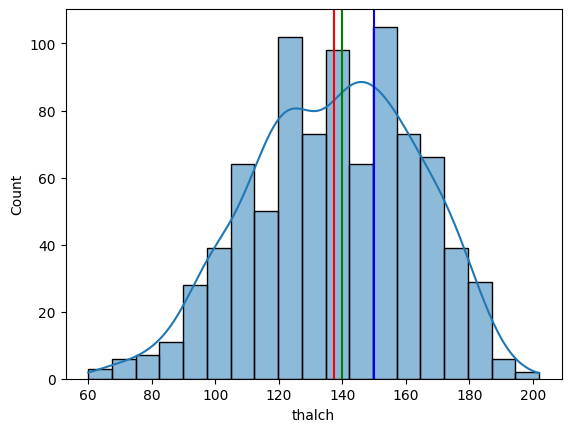

In [34]:
 # `chol` (serum cholesterol in mg/dl)
sns.histplot(df['thalch'], kde=True)
plt.axvline(df['thalch'].mean(), color='red')
plt.axvline(df['thalch'].median(), color='green')
plt.axvline(df['thalch'].mode()[0], color='blue')

In [35]:
df['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [36]:
df.groupby(df['exang'])[['sex']].value_counts()

exang  sex   
False  Male      379
       Female    149
True   Male      294
       Female     43
Name: count, dtype: int64

In [37]:
df['oldpeak'].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [38]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [39]:
df.groupby(df['slope'])['restecg'].value_counts()

slope        restecg         
downsloping  normal               31
             lv hypertrophy       17
             st-t abnormality     15
flat         normal              206
             lv hypertrophy       84
             st-t abnormality     55
upsloping    normal              116
             lv hypertrophy       64
             st-t abnormality     22
Name: count, dtype: int64

In [40]:
df['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [41]:
print(df['num'].unique())

[0 2 1 3 4]


In [42]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [43]:
df.groupby(df['num'])[['dataset']].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
Name: count, dtype: int64

In [44]:
#Understading the correlation

In [45]:
df['restecg'] = df['restecg'].apply(lambda x:0 if x=='normal' else( 1 if x=='lv hypertrophy' else 2) )

In [46]:
df['slope']= df['slope'].apply(lambda x:0 if x=='flat' else( 1 if x=='upsloping' else 2) )

In [47]:
#df.drop(['id','dataset'],axis=1,inplace=True)

In [48]:
#handling The Outliers
df

,Unnamed: 0,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,BMI
0,0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,1,150.0,False,2.3,2,0.0,0,18
1,1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,1,108.0,True,1.5,0,3.0,2,29
2,2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,1,129.0,True,2.6,0,2.0,1,22
3,3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,0,187.0,False,3.5,2,0.0,0,20
4,4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,1,172.0,False,1.4,1,0.0,0,18
5,5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,0,178.0,False,0.8,1,0.0,0,20
6,6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,1,160.0,False,3.6,2,2.0,3,36
7,7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,0,163.0,True,0.6,1,0.0,0,20
8,8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,1,147.0,False,1.4,0,1.0,2,25
9,9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,1,155.0,True,3.1,2,0.0,1,22


<Axes: >

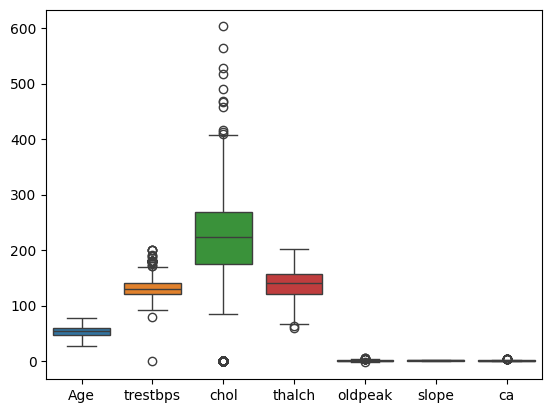

In [49]:
import seaborn as sns
import pandas as pd

# Example data
data = pd.DataFrame({
    "Age": df['age'],
    "trestbps": df['trestbps'],
    "chol": df['chol'],
    "thalch":df['thalch'],
    "oldpeak":df['oldpeak'],
    "slope":df['slope'],
    "ca":df['ca']
    
})

# Plotting boxplots
sns.boxplot(data=data)

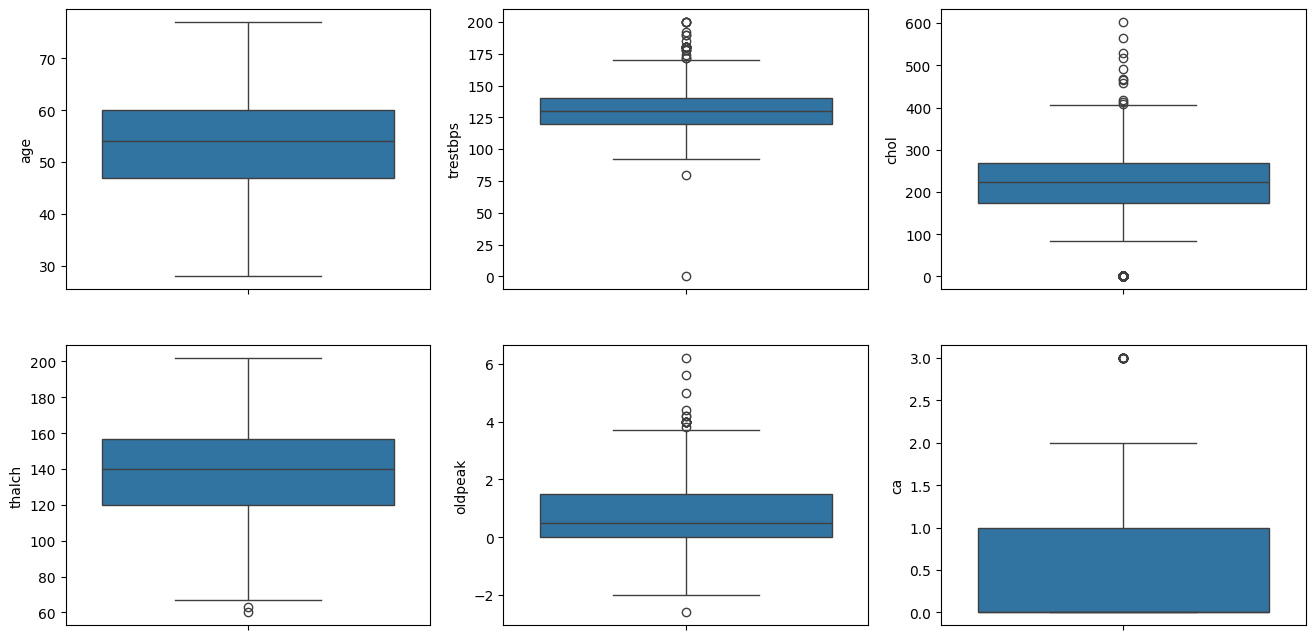

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['age'])

plt.subplot(2,3,2)
sns.boxplot(df['trestbps'])

plt.subplot(2,3,3)
sns.boxplot(df['chol'])

plt.subplot(2,3,4)
sns.boxplot(df['thalch'])

plt.subplot(2,3,5)
sns.boxplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.boxplot(df['ca'])

# Show the plots
plt.show()

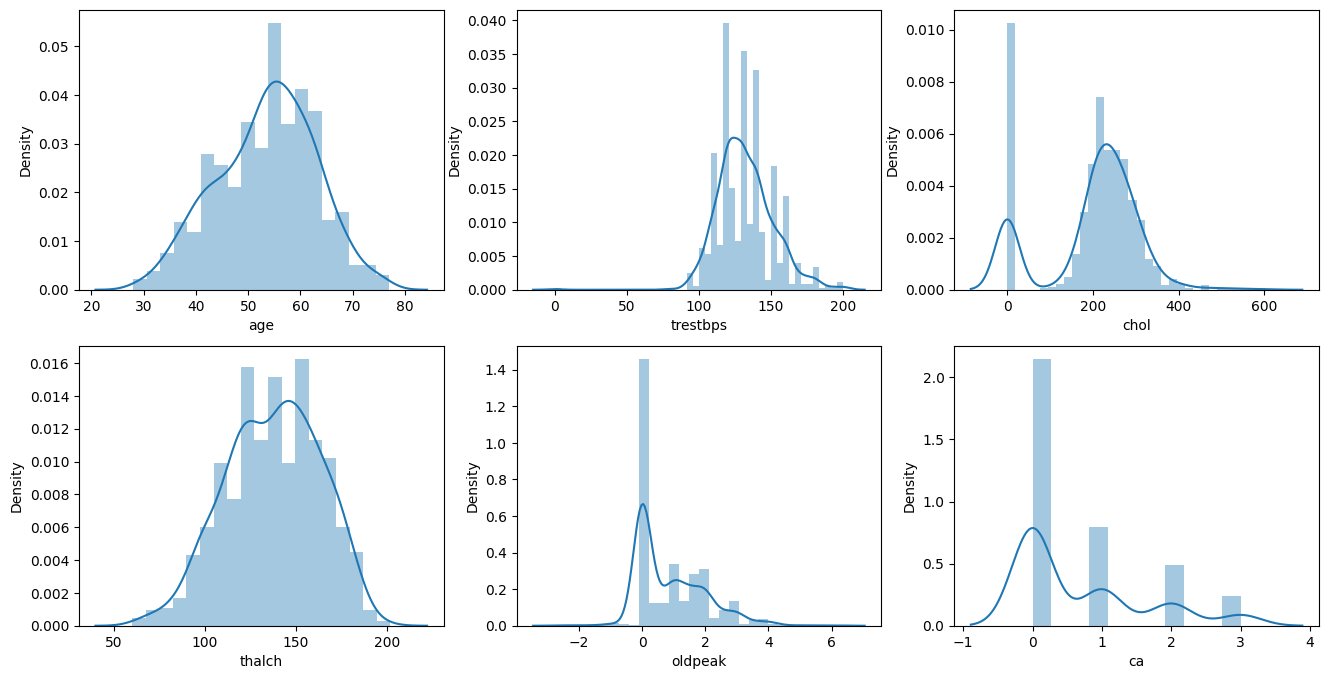

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.distplot(df['age'])

plt.subplot(2,3,2)
sns.distplot(df['trestbps'])

plt.subplot(2,3,3)
sns.distplot(df['chol'])

plt.subplot(2,3,4)
sns.distplot(df['thalch'])

plt.subplot(2,3,5)
sns.distplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.distplot(df['ca'])

# Show the plots
plt.show()

In [52]:
upperthalch = df['thalch'].mean()+3*df['thalch'].std()
upperthalch

215.32449421827715

In [53]:
lowerthalch = df['thalch'].mean() - 3 * df['thalch'].std()
lowerthalch

59.76683526149161

In [54]:
df[(df['thalch']>215.32) | (df['thalch']<5)]

,Unnamed: 0,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,BMI


In [55]:
df['age'].skew()

-0.195993861608106

In [56]:
df['trestbps'].skew()

0.21333446967212508

In [57]:
df['chol'].skew()

-0.6138360897370758

In [58]:
df['thalch'].skew()

-0.21111858073161133

In [59]:
df['oldpeak'].skew()

1.0414266146339854

In [60]:
df['ca'].skew()

1.1659778654172832

In [61]:
p25t = df['trestbps'].quantile(0.25)
p75t = df['trestbps'].quantile(0.75)
iqrt = p75t-p25t
uppert = p75t+iqrt
lowert = p25t-iqrt

In [62]:
uppert

160.0

In [63]:
lowert

100.0

In [64]:
df['trestbps'] = np.where(df['trestbps']>uppert,uppert,np.where(
df['trestbps']<lowert,lowert,df['trestbps']))

In [65]:
p25c = df['chol'].quantile(0.25)
p75c = df['chol'].quantile(0.75)
iqrc = p75c-p25c
upperc = p75c+iqrc
lowerc = p25c-iqrc

In [66]:
upperc

361.0

In [67]:
lowerc

82.0

In [68]:
df['chol'] = np.where(df['chol']>upperc,upperc,np.where(
df['chol']<lowerc,lowerc,df['chol']))

In [69]:
p25o = df['oldpeak'].quantile(0.25)
p75o = df['oldpeak'].quantile(0.75)
iqro = p75o-p25o
uppero = p75o+iqro
lowero = p25o-iqro

In [70]:
uppero

3.0

In [71]:
lowero

-1.5

In [72]:
df['oldpeak'] = np.where(df['oldpeak']>uppero,uppero,np.where(df['oldpeak']<lowero,lowero,df['oldpeak']))

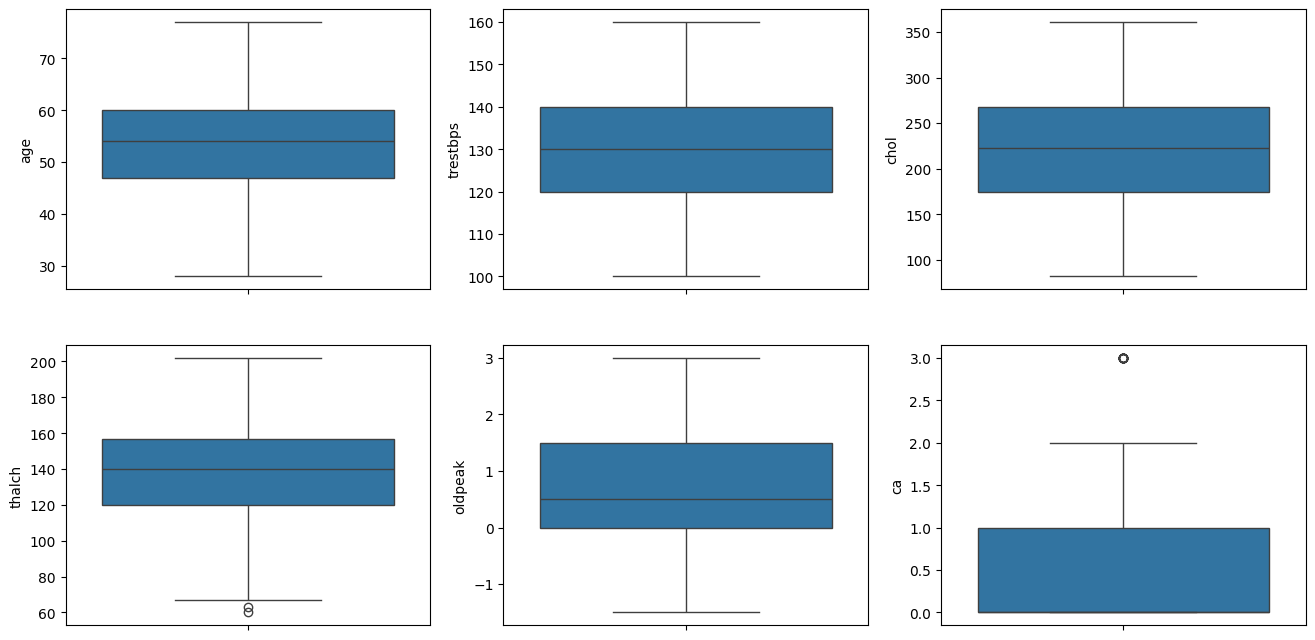

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['age'])

plt.subplot(2,3,2)
sns.boxplot(df['trestbps'])

plt.subplot(2,3,3)
sns.boxplot(df['chol'])

plt.subplot(2,3,4)
sns.boxplot(df['thalch'])

plt.subplot(2,3,5)
sns.boxplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.boxplot(df['ca'])

# Show the plots
plt.show()

In [74]:
df.drop(columns=['Unnamed: 0'],inplace =True)

In [75]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'num', 'BMI'],
      dtype='object')

In [76]:
df.drop(columns=['dataset'],inplace=True)

In [77]:
df.drop(columns = ['id'],inplace = True)

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['num'],axis=1),df['num'])

In [79]:
trf2= ColumnTransformer(transformers = [
    ('impute_bps_Chol_thal_ch_oldPeak_ca',SimpleImputer(),[3,4,7,9,11]),
    ('impute_fbs_restecg_exang_slope',SimpleImputer(strategy='most_frequent'),[5,6,8,10]),
    ('oc',OrdinalEncoder(categories=[['asymptomatic','non-anginal','atypical angina','typical angina']]),[2]),
    ('oh_sex_fbs_exang',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,5,8]),
],remainder='passthrough')

In [80]:
trf3 = StandardScaler()

In [81]:
pipe = make_pipeline(trf2,trf3)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,100,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'knearestneighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,30]
        }
    },
    'naive_bayes':{
        'model':GaussianNB(),
        'params':{
            
        }
    }
}

In [85]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    X = pipe.fit_transform(X_train)
    clf.fit(X,Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scores

,model,best_score,best_params
0,svm,0.753623,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.844928,{'n_estimators': 1000}
2,logistic_regression,0.691304,{'C': 10}
3,knearestneighbors,0.578261,{'n_neighbors': 5}
4,naive_bayes,0.475362,{}


In [86]:
X = df.drop('num',axis=1)
y = df['num']
# replace 1 with 0 and all others to 1
y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

In [88]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
    
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,2,3]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(penalty='l2'),
        'params': {
            
        }
    },
    'knearestneighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,30]
        }
    },
    'naive_bayes':{
        'model':GaussianNB(),
        'params':{
            
        }
    }
}

In [89]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    X = pipe.fit_transform(X_train)
    clf.fit(X,Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scores

,model,best_score,best_params
0,svm,0.834783,{}
1,random_forest,0.892754,{'n_estimators': 2}
2,logistic_regression,0.866667,{}
3,knearestneighbors,0.830435,{'n_neighbors': 5}
4,naive_bayes,0.872464,{}


In [90]:
import joblib

In [91]:
last_pipe = make_pipeline(trf2,trf3,trf5)

NameError: name 'trf5' is not defined

In [ ]:
last_pipe.fit(X_train,Y_train)

In [ ]:
last_pipe.predict([[12.0, 'Male', 'typical angina', 200.0, 126.0, 1, 0.0, 82.0, 1, 5.0, 0.0, 3.0, 30.0]])

In [ ]:
len([63,'Male','typical angina',145.0,233.0,True,1,150.0,False,2.3,2,0.0,13])

In [ ]:
joblib.dump(last_pipe,'major_finalModel5.pkl')

In [ ]:
import sklearn
print(sklearn.__version__)